# Figure 2

Behavior of $Z(p)$ as a function of $p$. We can see various values of $N$ (number of agents) and $B$ (bar capacity). In all cases, $\mu = 0.5$. The dashed vertical line indicates $p = \mu = 0.5$, and the horizontal dashed line represents $Z(p) = 0$. The intersection points with the horizontal axis correspond to the equilibrium condition, and the peak points to the optimal value of $Z$ at the optimal probability $p^*$.

In [1]:
import sys

sys.path.append('../src')

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
from bayes_opt import BayesianOptimization

from Config.config import PATHS

In [3]:
def binomial(k, N, p):
    a1_probs = p ** k
    a2_probs = (1-p) ** (N - k)
    combination = math.comb(N, k)
#    print(f'{combination} * {go} * {no_go}')
    return combination * a1_probs * a2_probs

def Z(p, N=10, B=6):
    sum_below_B = sum([k*binomial(k, N, p) for k in range(B+1)])
    sum_above_B = sum([k*binomial(k, N, p) for k in range(B+1, N+1)])
    return sum_below_B - sum_above_B

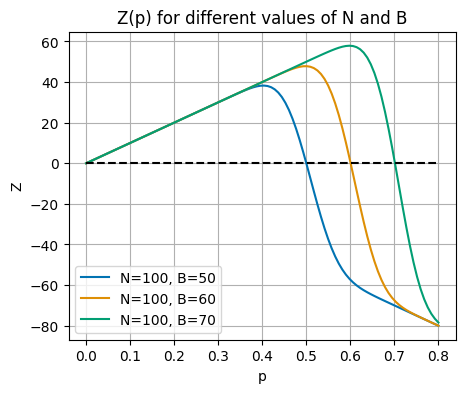

In [12]:
fig, ax = plt.subplots(figsize=(5, 4))
palette = sns.color_palette('colorblind', 6)
maximo = 0.8
N = 100
for i, mu in enumerate([0.5, 0.6, 0.7]):
	B = int(N * mu)
	X = np.linspace(0, maximo, 100)
	Y = [Z(p, N, B) for p in X]
	ax = sns.lineplot(x=X, y=Y, label=f'N={N}, B={B}', color=palette[i])
ax.hlines(0, 0, maximo, color='black', linestyle='--')
# ax.vlines(mu, -N, N, color='black', linestyle='--')
ax.set_xlabel('p')
ax.set_ylabel('Z')
ax.set_title(r'Z(p) for different values of N and B')
# ax.set_ylim([-2, 2])
ax.grid()

In [13]:
fig.savefig(PATHS['figures_for_paper'] / 'Figure2.png', dpi=300)

### Get optimal values

In [14]:
def get_p_star(N, B):
    # Bounded region of parameter space
    pbounds = {'p': (0, 1)}
    optimizer = BayesianOptimization(
        f=lambda p: Z(p, N, B),
        pbounds=pbounds,
        random_state=1,
        verbose=False
    )
    optimizer.maximize(
        init_points=10,
        n_iter=10,
    )
    result = optimizer.max
    return result['params']['p']

In [15]:
mu = 0.5
B = lambda N: int(N * mu)
# values = [(N, B(N)) for N in range(2, 8)]
values = [(100, 50), (100, 60), (100, 70)]
p_stars = list()

for N, B in values:
	p_star = get_p_star(N, B)
	p_stars.append(p_star)

df = pd.DataFrame({
	'N': [N for N, _ in values],
	'B': [B for _, B in values],
	'p_star': p_stars
})
df

,N,B,p_star
0,100,50,0.402437
1,100,60,0.497937
2,100,70,0.597793
